In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import pickle
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pricess/prices.csv
/kaggle/input/lstmmod/LSTM2.h5
/kaggle/input/lstmmod/LSTM1.pkl
/kaggle/input/lstmmod/LSTM3.h5
/kaggle/input/petroldieselcsv/petrol.csv


Data Collection and exploratory analysis

In [16]:
# loading the data from csv to pandas dataframe and noticing all insights
df = pd.read_csv('/kaggle/input/pricess/prices.csv')
df=df.iloc[: :-1].reset_index(drop=True)
df

# from pandas_profiling import ProfileReport
# ProfileReport(df)


,Date,Delhi-petrol,Mumbai-petrol,Chennai-petrol,Kolkata-petrol,Delhi-diesel,Mumbai-diesel,Chennai-diesel,Kolkata-diesel
0,16/Jun/17,65.48,76.70,68.02,68.03,54.49,59.90,57.41,56.65
1,17/Jun/17,65.23,76.46,67.76,67.84,54.32,59.73,57.23,56.48
2,18/Jun/17,64.91,76.14,67.42,67.58,54.14,59.53,57.03,56.29
3,19/Jun/17,64.65,75.88,67.14,67.37,54.01,59.39,56.89,56.16
4,20/Jun/17,64.55,75.78,67.04,67.30,53.96,59.34,56.85,56.12
...,...,...,...,...,...,...,...,...,...
1493,18/Jul/21,101.84,107.83,102.49,102.08,89.87,97.45,94.39,93.02
1494,19/Jul/21,101.84,107.83,102.49,102.08,89.87,97.45,94.39,93.02
1495,20/Jul/21,101.84,107.83,102.49,102.08,89.87,97.45,94.39,93.02
1496,21/Jul/21,101.84,107.83,102.49,102.08,89.87,97.45,94.39,93.02


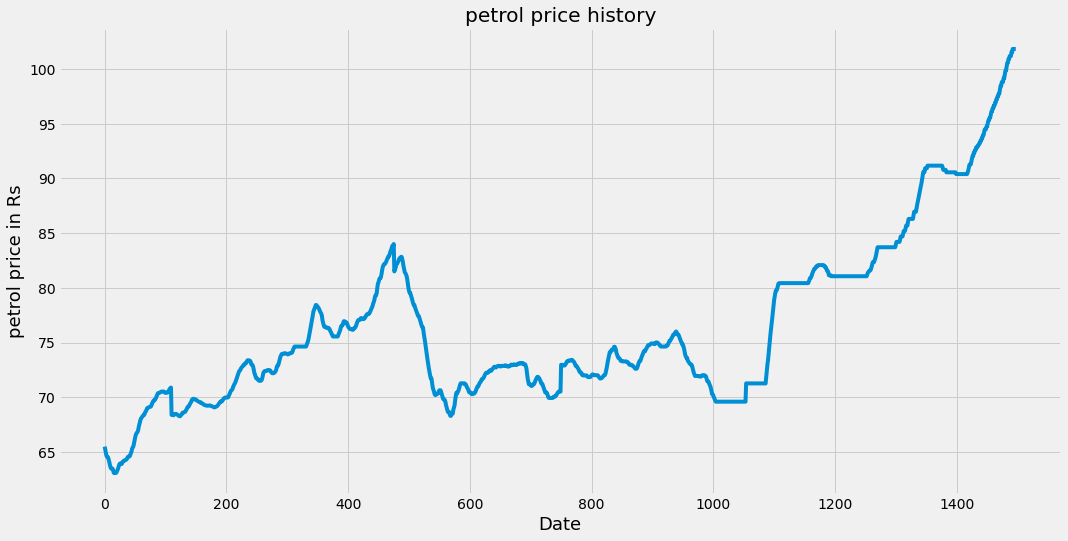

In [17]:
plt.figure(figsize=(16,8))
plt.title('petrol price history')
plt.plot(df['Delhi-petrol'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('petrol price in Rs', fontsize=18)
plt.show()

In [18]:
data=df.filter(['Delhi-petrol'])
dataset=data.values
print(data)
print(dataset)

      Delhi-petrol
0            65.48
1            65.23
2            64.91
3            64.65
4            64.55
...            ...
1493        101.84
1494        101.84
1495        101.84
1496        101.84
1497        101.84

[1498 rows x 1 columns]
[[ 65.48]
 [ 65.23]
 [ 64.91]
 ...
 [101.84]
 [101.84]
 [101.84]]


In [19]:
training_data_len=int(len(dataset)*0.9)
print(training_data_len)

1348


Training data Prediction

In [20]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.0624033 ],
       [0.05595668],
       [0.047705  ],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

In [21]:
train_data=scaled_data[0:training_data_len, :]
X_train=[]
Y_train=[]

for i in range (60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    Y_train.append(train_data[i, 0])
    if i<=60 :
        print(X_train)
        print(Y_train)
        print()

[array([0.0624033 , 0.05595668, 0.047705  , 0.04100052, 0.03842187,
       0.03842187, 0.03558535, 0.03017019, 0.02398143, 0.01676122,
       0.01263538, 0.0103146 , 0.0103146 , 0.01057246, 0.00644662,
       0.00077359, 0.        , 0.00180505, 0.00051573, 0.00051573,
       0.00335224, 0.00696235, 0.0103146 , 0.01521403, 0.0198556 ,
       0.02243424, 0.02243424, 0.02191851, 0.02140278, 0.02501289,
       0.02707581, 0.02810727, 0.02965446, 0.02965446, 0.03068592,
       0.03145952, 0.03197524, 0.03455389, 0.03790614, 0.0389376 ,
       0.0389376 , 0.03945333, 0.04203198, 0.04667354, 0.05002579,
       0.05673027, 0.06034038, 0.06214544, 0.06781846, 0.07581227,
       0.08303249, 0.08896338, 0.09283136, 0.09515214, 0.09669933,
       0.1005673 , 0.10856111, 0.11449201, 0.12119649, 0.12609593])]
[0.1294481691593603]



In [22]:
X_train,Y_train= np.array(X_train),np.array(Y_train)
X_train.shape

(1288, 60)

In [23]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1288, 60, 1)

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,Y_train,epochs=1,batch_size=1,verbose=1)

1288/1288 [==============================] - 36s 26ms/step - loss: 0.0013


In [ ]:
# from keras.models import load_model
# model = load_model('/kaggle/input/lstmmod/LSTM2.h5')

In [27]:
#
test_data=scaled_data[training_data_len- 60: , :]
len(test_data)

210

In [28]:
#
X_test=[]
Y_test=dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [29]:
print(len(X_test))
print(len(Y_test))

150
150


In [30]:
X_test=np.array(X_test)

In [31]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(150, 60, 1)

In [32]:
predictions=model.predict(X_test)

In [33]:
predictions=scaler.inverse_transform(predictions)

In [34]:
rmse=np.sqrt(np.mean(predictions - Y_test)**2)
rmse

0.13224728800455865

In [35]:
rms=mean_squared_error(predictions,Y_test)
print(rms)

0.052736403632119885


In [36]:
math.sqrt(mean_squared_error(predictions,Y_test))

0.2296440803332842

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


      Delhi-petrol  Predictions
1348         90.93    90.583481
1349         90.93    90.763733
1350         90.93    90.894188
1351         90.93    90.968590
1352         91.17    90.992332
...            ...          ...
1493        101.84   102.027344
1494        101.84   102.145988
1495        101.84   102.237671
1496        101.84   102.295998
1497        101.84   102.322609

[150 rows x 2 columns]


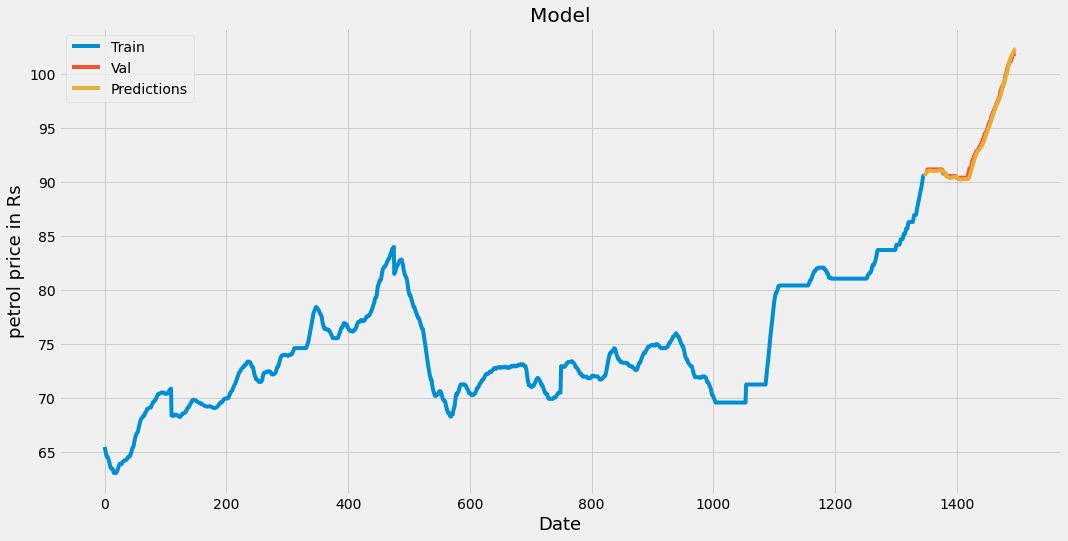

In [38]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
print(valid)

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('petrol price in Rs', fontsize=18)
plt.plot(train['Delhi-petrol'])
plt.plot(valid[['Delhi-petrol', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [39]:
valid

,Delhi-petrol,Predictions
1348,90.93,90.583481
1349,90.93,90.763733
1350,90.93,90.894188
1351,90.93,90.968590
1352,91.17,90.992332
...,...,...
1493,101.84,102.027344
1494,101.84,102.145988
1495,101.84,102.237671
1496,101.84,102.295998


In [40]:
len(test_data)

210

In [41]:
#
x_input=test_data[len(test_data)-60:].reshape(1,-1)
x_input.shape

(1, 60)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
#jo upar
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<10):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

[1.0124761]
61
1 day input [0.7833935  0.7833935  0.78958226 0.78958226 0.79628675 0.79628675
 0.80376483 0.81046931 0.81046931 0.81046931 0.81743167 0.81743167
 0.82439402 0.83161423 0.83161423 0.83806086 0.83806086 0.84553894
 0.85250129 0.85250129 0.85997937 0.85997937 0.86642599 0.86642599
 0.87338834 0.87338834 0.88086643 0.88086643 0.88808664 0.88808664
 0.89479113 0.89479113 0.9038164  0.91284167 0.91284167 0.92186694
 0.92186694 0.92186694 0.93089221 0.93089221 0.93991748 0.94894275
 0.94894275 0.95796802 0.9669933  0.9669933  0.97601857 0.97601857
 0.98323878 0.98323878 0.98323878 0.99226405 0.99226405 1.
 1.         1.         1.         1.         1.         1.01247609]
1 day output [[1.0144746]]
2 day input [0.7833935  0.78958226 0.78958226 0.79628675 0.79628675 0.80376483
 0.81046931 0.81046931 0.81046931 0.81743167 0.81743167 0.82439402
 0.83161423 0.83161423 0.83806086 0.83806086 0.84553894 0.85250129
 0.85250129 0.85997937 0.85997937 0.86642599 0.86642599 0.87338834
 0.

## 

In [44]:
#
day_new=np.arange(1,61)
day_pred=np.arange(61,71)

In [46]:
1498-60

1438

[[ 93.21]
 [ 93.44]
 [ 93.44]
 [ 93.68]
 [ 93.68]
 [ 93.94]
 [ 93.94]
 [ 94.23]
 [ 94.49]
 [ 94.49]
 [ 94.49]
 [ 94.76]
 [ 94.76]
 [ 95.03]
 [ 95.31]
 [ 95.31]
 [ 95.56]
 [ 95.56]
 [ 95.85]
 [ 96.12]
 [ 96.12]
 [ 96.41]
 [ 96.41]
 [ 96.66]
 [ 96.66]
 [ 96.93]
 [ 96.93]
 [ 97.22]
 [ 97.22]
 [ 97.5 ]
 [ 97.5 ]
 [ 97.76]
 [ 97.76]
 [ 98.11]
 [ 98.46]
 [ 98.46]
 [ 98.81]
 [ 98.81]
 [ 98.81]
 [ 99.16]
 [ 99.16]
 [ 99.51]
 [ 99.86]
 [ 99.86]
 [100.21]
 [100.56]
 [100.56]
 [100.91]
 [100.91]
 [101.19]
 [101.19]
 [101.19]
 [101.54]
 [101.54]
 [101.84]
 [101.84]
 [101.84]
 [101.84]
 [101.84]
 [101.84]]
[[102.32382264]
 [102.40132617]
 [102.52290477]
 [102.67398232]
 [102.84660276]
 [103.0362957 ]
 [103.24056477]
 [103.45791674]
 [103.6873808 ]
 [103.92829125]]


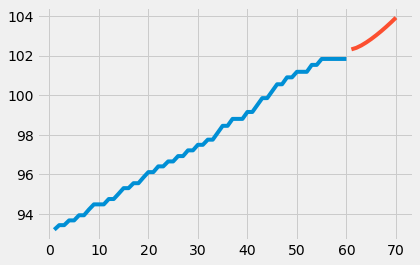

In [48]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[1438:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(scaled_data[1438:]))
print(scaler.inverse_transform(lst_output))